## Stationarity

Some time-series models, such as such as [ARIMA](#ARIMA), assume that the underlying data is stationary. 
Stationarity describes that the time-series has
* constant mean and mean is not time-dependent 
* constant variance and variance is not time-dependent 
* constant covariance and covariance is not time-dependent 

> If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series **with trend and/or seasonality are not stationary**. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

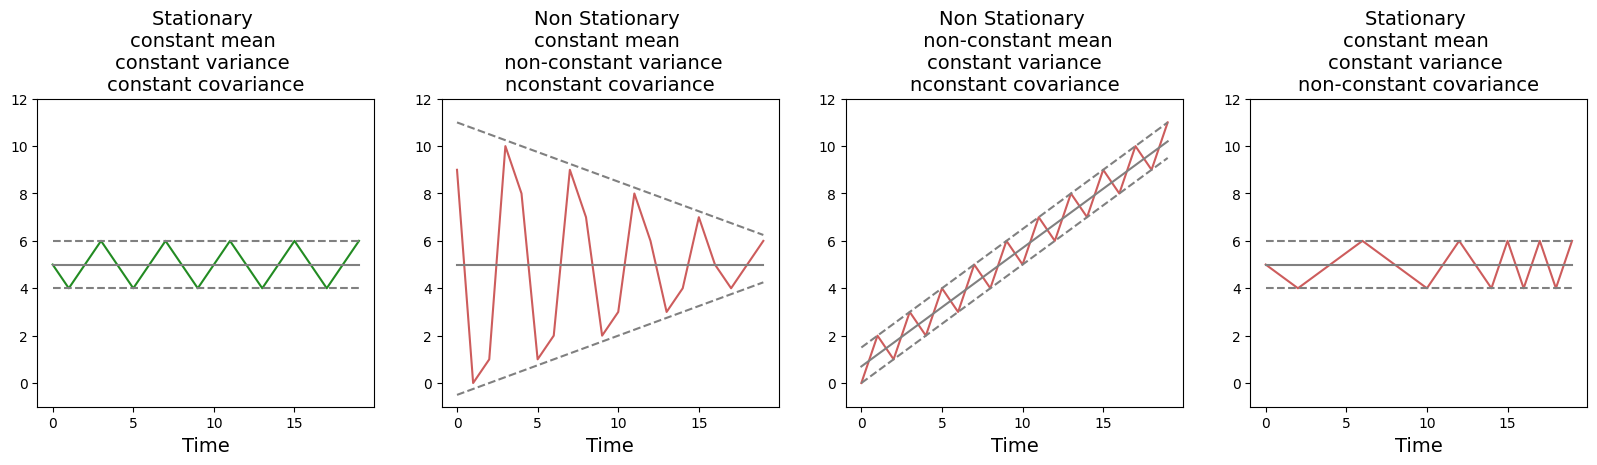

In [2]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

The check for stationarity can be done via three different approaches:
1. **visually**: plot time series and check for trends or seasonality
2. **basic statistics**: split time series and compare the mean and variance of each partition
3. **statistical test**: Augmented Dickey Fuller test

Let's do the **visual check** first. We can see that all features except `Temperature` have non-constant mean and non-constant variance. Therefore, **none of these seem to be stationary**. However, `Temperature` shows strong seasonality (hot in summer, cold in winter) and therefore it is not stationary either.

In [3]:
from datetime import date
df = pd.read_csv('dataset/final_df_002.csv')
df['Date Time'] = pd.to_datetime(df['Date Time'])

In [4]:
df.head()

,Date Time,Heater Heat Output,T.F Heater Outlet Flow Transmitter,T.F. Heater Serpentine Coil Outlet Temperature,Heater Outlet Flue Gas O2 Analyzer,T.F. Heater Outlet Flue Gas Temperature,Average T.F. Heater Outlet Temperature,Average T.F. Heater Serpentine Coil Inlet Temperature,Average Furnace Exit Temperature
0,2024-08-01 06:40:00,5142770.5,489.726562,223.199997,6.488715,392.299988,236.03333,212.949997,716.25
1,2024-08-01 06:50:00,5142770.5,489.726562,223.199997,6.488715,392.299988,236.03333,212.949997,716.25
2,2024-08-01 07:00:00,5142770.5,489.726562,223.199997,6.488715,392.299988,236.03333,212.949997,716.25
3,2024-08-01 07:10:00,5142770.5,489.726562,223.199997,6.488715,392.299988,236.03333,212.949997,716.25
4,2024-08-01 07:20:00,5142770.5,489.726562,223.199997,6.488715,392.299988,236.03333,212.949997,716.25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Date Time                                              5760 non-null   datetime64[ns]
 1   Heater Heat Output                                     5760 non-null   float64       
 2   T.F Heater Outlet Flow Transmitter                     5760 non-null   float64       
 3   T.F. Heater Serpentine Coil Outlet Temperature         5760 non-null   float64       
 4   Heater Outlet Flue Gas O2 Analyzer                     5760 non-null   float64       
 5   T.F. Heater Outlet Flue Gas Temperature                5760 non-null   float64       
 6   Average T.F. Heater Outlet Temperature                 5760 non-null   float64       
 7   Average T.F. Heater Serpentine Coil Inlet Temperature  5760 non-null  

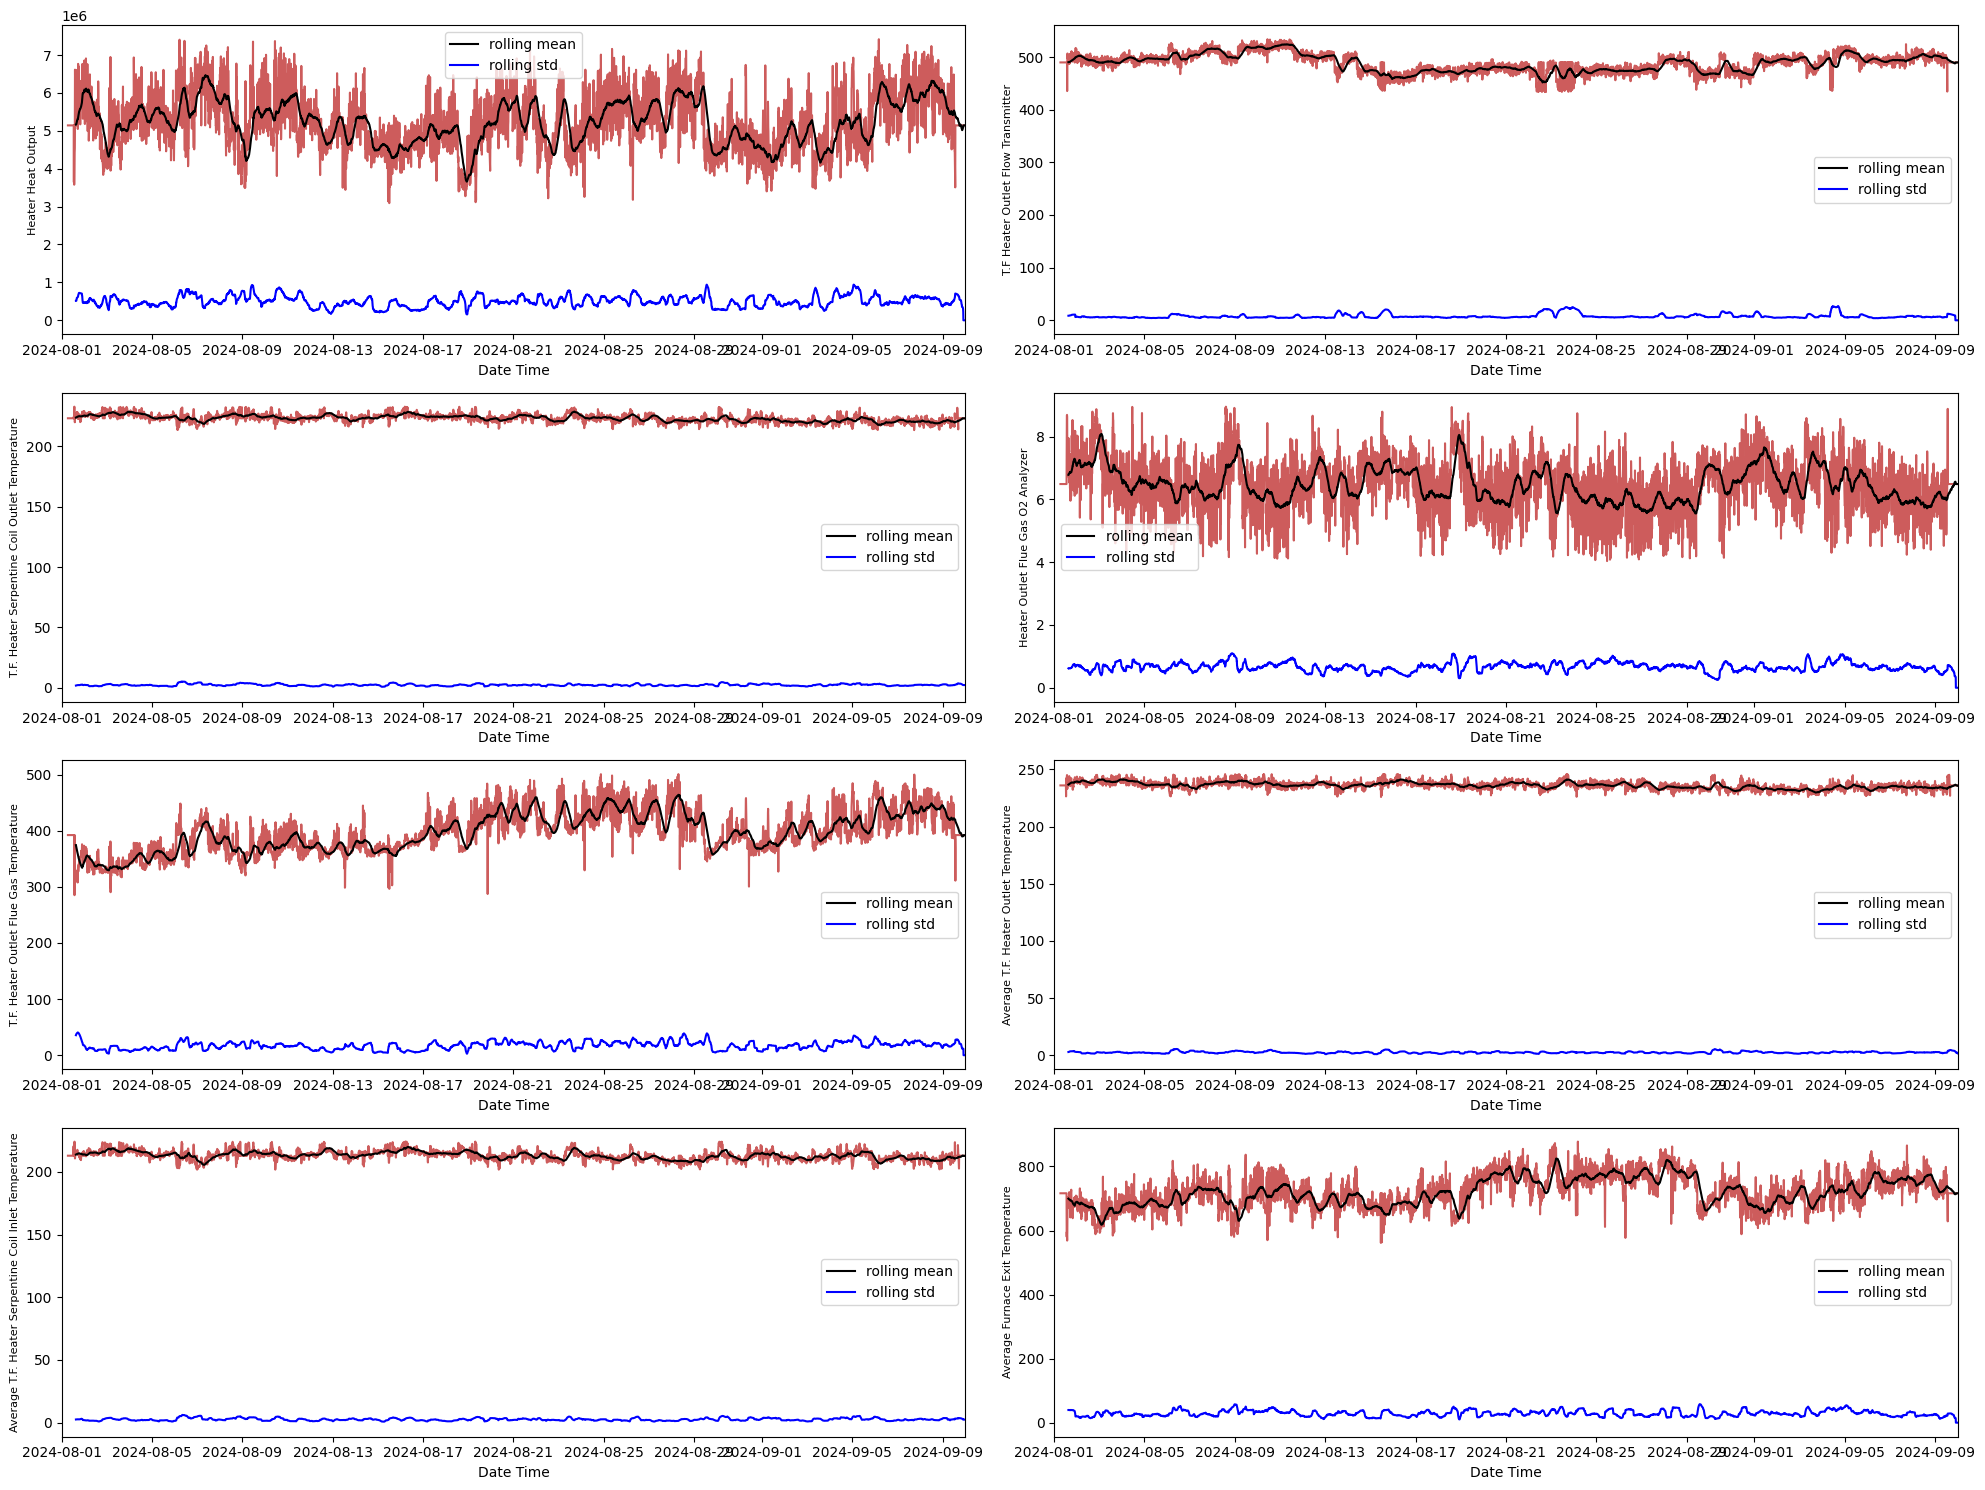

In [10]:
features_to_plot = [
    'Heater Heat Output', 'T.F Heater Outlet Flow Transmitter',
    'T.F. Heater Serpentine Coil Outlet Temperature', 'Heater Outlet Flue Gas O2 Analyzer',
    'T.F. Heater Outlet Flue Gas Temperature', 'Average T.F. Heater Outlet Temperature',
    'Average T.F. Heater Serpentine Coil Inlet Temperature', 'Average Furnace Exit Temperature'
]
rolling_window = 52
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

sns.lineplot(x=df['Date Time'], y=df['Heater Heat Output'], ax=ax[0, 0], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['Heater Heat Output'].rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['Heater Heat Output'].rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_ylabel(ylabel='Heater Heat Output', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['T.F Heater Outlet Flow Transmitter'], ax=ax[0, 1], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['T.F Heater Outlet Flow Transmitter'].rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['T.F Heater Outlet Flow Transmitter'].rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_ylabel(ylabel='T.F Heater Outlet Flow Transmitter', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Serpentine Coil Outlet Temperature'], ax=ax[1, 0], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Serpentine Coil Outlet Temperature'].rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Serpentine Coil Outlet Temperature'].rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_ylabel(ylabel='T.F. Heater Serpentine Coil Outlet Temperature', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['Heater Outlet Flue Gas O2 Analyzer'], ax=ax[1, 1], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['Heater Outlet Flue Gas O2 Analyzer'].rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['Heater Outlet Flue Gas O2 Analyzer'].rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_ylabel(ylabel='Heater Outlet Flue Gas O2 Analyzer', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Outlet Flue Gas Temperature'], ax=ax[2, 0], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Outlet Flue Gas Temperature'].rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['T.F. Heater Outlet Flue Gas Temperature'].rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_ylabel(ylabel='T.F. Heater Outlet Flue Gas Temperature', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Outlet Temperature'], ax=ax[2, 1], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Outlet Temperature'].rolling(rolling_window).mean(), ax=ax[2, 1], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Outlet Temperature'].rolling(rolling_window).std(), ax=ax[2, 1], color='blue', label='rolling std')
ax[2, 1].set_ylabel(ylabel='Average T.F. Heater Outlet Temperature', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Serpentine Coil Inlet Temperature'], ax=ax[3, 0], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Serpentine Coil Inlet Temperature'].rolling(rolling_window).mean(), ax=ax[3, 0], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['Average T.F. Heater Serpentine Coil Inlet Temperature'].rolling(rolling_window).std(), ax=ax[3, 0], color='blue', label='rolling std')
ax[3, 0].set_ylabel(ylabel='Average T.F. Heater Serpentine Coil Inlet Temperature', fontsize=8)

sns.lineplot(x=df['Date Time'], y=df['Average Furnace Exit Temperature'], ax=ax[3, 1], color='indianred')
sns.lineplot(x=df['Date Time'], y=df['Average Furnace Exit Temperature'].rolling(rolling_window).mean(), ax=ax[3, 1], color='black', label='rolling mean')
sns.lineplot(x=df['Date Time'], y=df['Average Furnace Exit Temperature'].rolling(rolling_window).std(), ax=ax[3, 1], color='blue', label='rolling std')
ax[3, 1].set_ylabel(ylabel='Average Furnace Exit Temperature', fontsize=8)

for i in range(4):
    ax[i,0].set_xlim([date(2024, 8, 1), date(2024, 9, 10)])
    ax[i,1].set_xlim([date(2024, 8, 1), date(2024, 9, 10)])
plt.tight_layout()
plt.show()

***This visualization shows rolling mean (black) and rolling standard deviation (blue) for 8 time series features from August to September 2024, used to assess stationarity.***

--- **Top-left (Hourly Counts)**: Non-stationary. Mean fluctuates significantly (~3-7M), showing trends and level shifts.

--- **Top-right (Fillation Cluster Phylum)**: Stationary. Stable mean (~500) and minimal std variation.

--- **Middle-left (TF Insert Cache Hit)**: Stationary. Constant mean (~225) and flat std.

--- **Middle-right (Nexus Queue Pool)**: Weakly stationary. Mean oscillates (5-8) but std remains stable.

--- **Center-left (TF Insert Requests)**: Non-stationary. Mean increases mid-period (300→450).

--- **Center-right (Average Queue Depth)**: Stationary. Consistent mean (~225) throughout.

--- **Bottom-left (TF Cache Misses)**: Stationary. Steady mean (~210) and minimal variation.

--- **Bottom-right (Average Insert Latency)**: Stationary. Stable mean (~700) with consistent std.

Let's evaluate the histograms. Since we are looking at the mean and variance, we are expecting that the data conforms to a Gaussian distribution (bell shaped distribution) in case of stationarity.

**Augmented Dickey-Fuller (ADF) test**  is a type of statistical test called a unit root test.  Unit roots are a cause for non-stationarity.

* **Null Hypothesis (H0)**: Time series has a unit root. (Time series is **not stationary**).

* **Alternate Hypothesis (H1)**: Time series has no unit root (Time series is **stationary**).

If the **null hypothesis can be rejected**, we can conclude that the **time series is stationary**.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

* <font color='red'>**p-value > significance level (default: 0.05)**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**p-value <= significance level (default: 0.05)**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.
    
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.
* <font color='red'>**ADF statistic > critical value**</font>: Fail to reject the null hypothesis (H0), the data has a unit root and is <font color='red'>non-stationary</font>.
* <font color='green'>**ADF statistic < critical value**</font>: Reject the null hypothesis (H0), the data does not have a unit root and is <font color='green'>stationary</font>.

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Average T.F. Heater Serpentine Coil Inlet Temperature'].values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

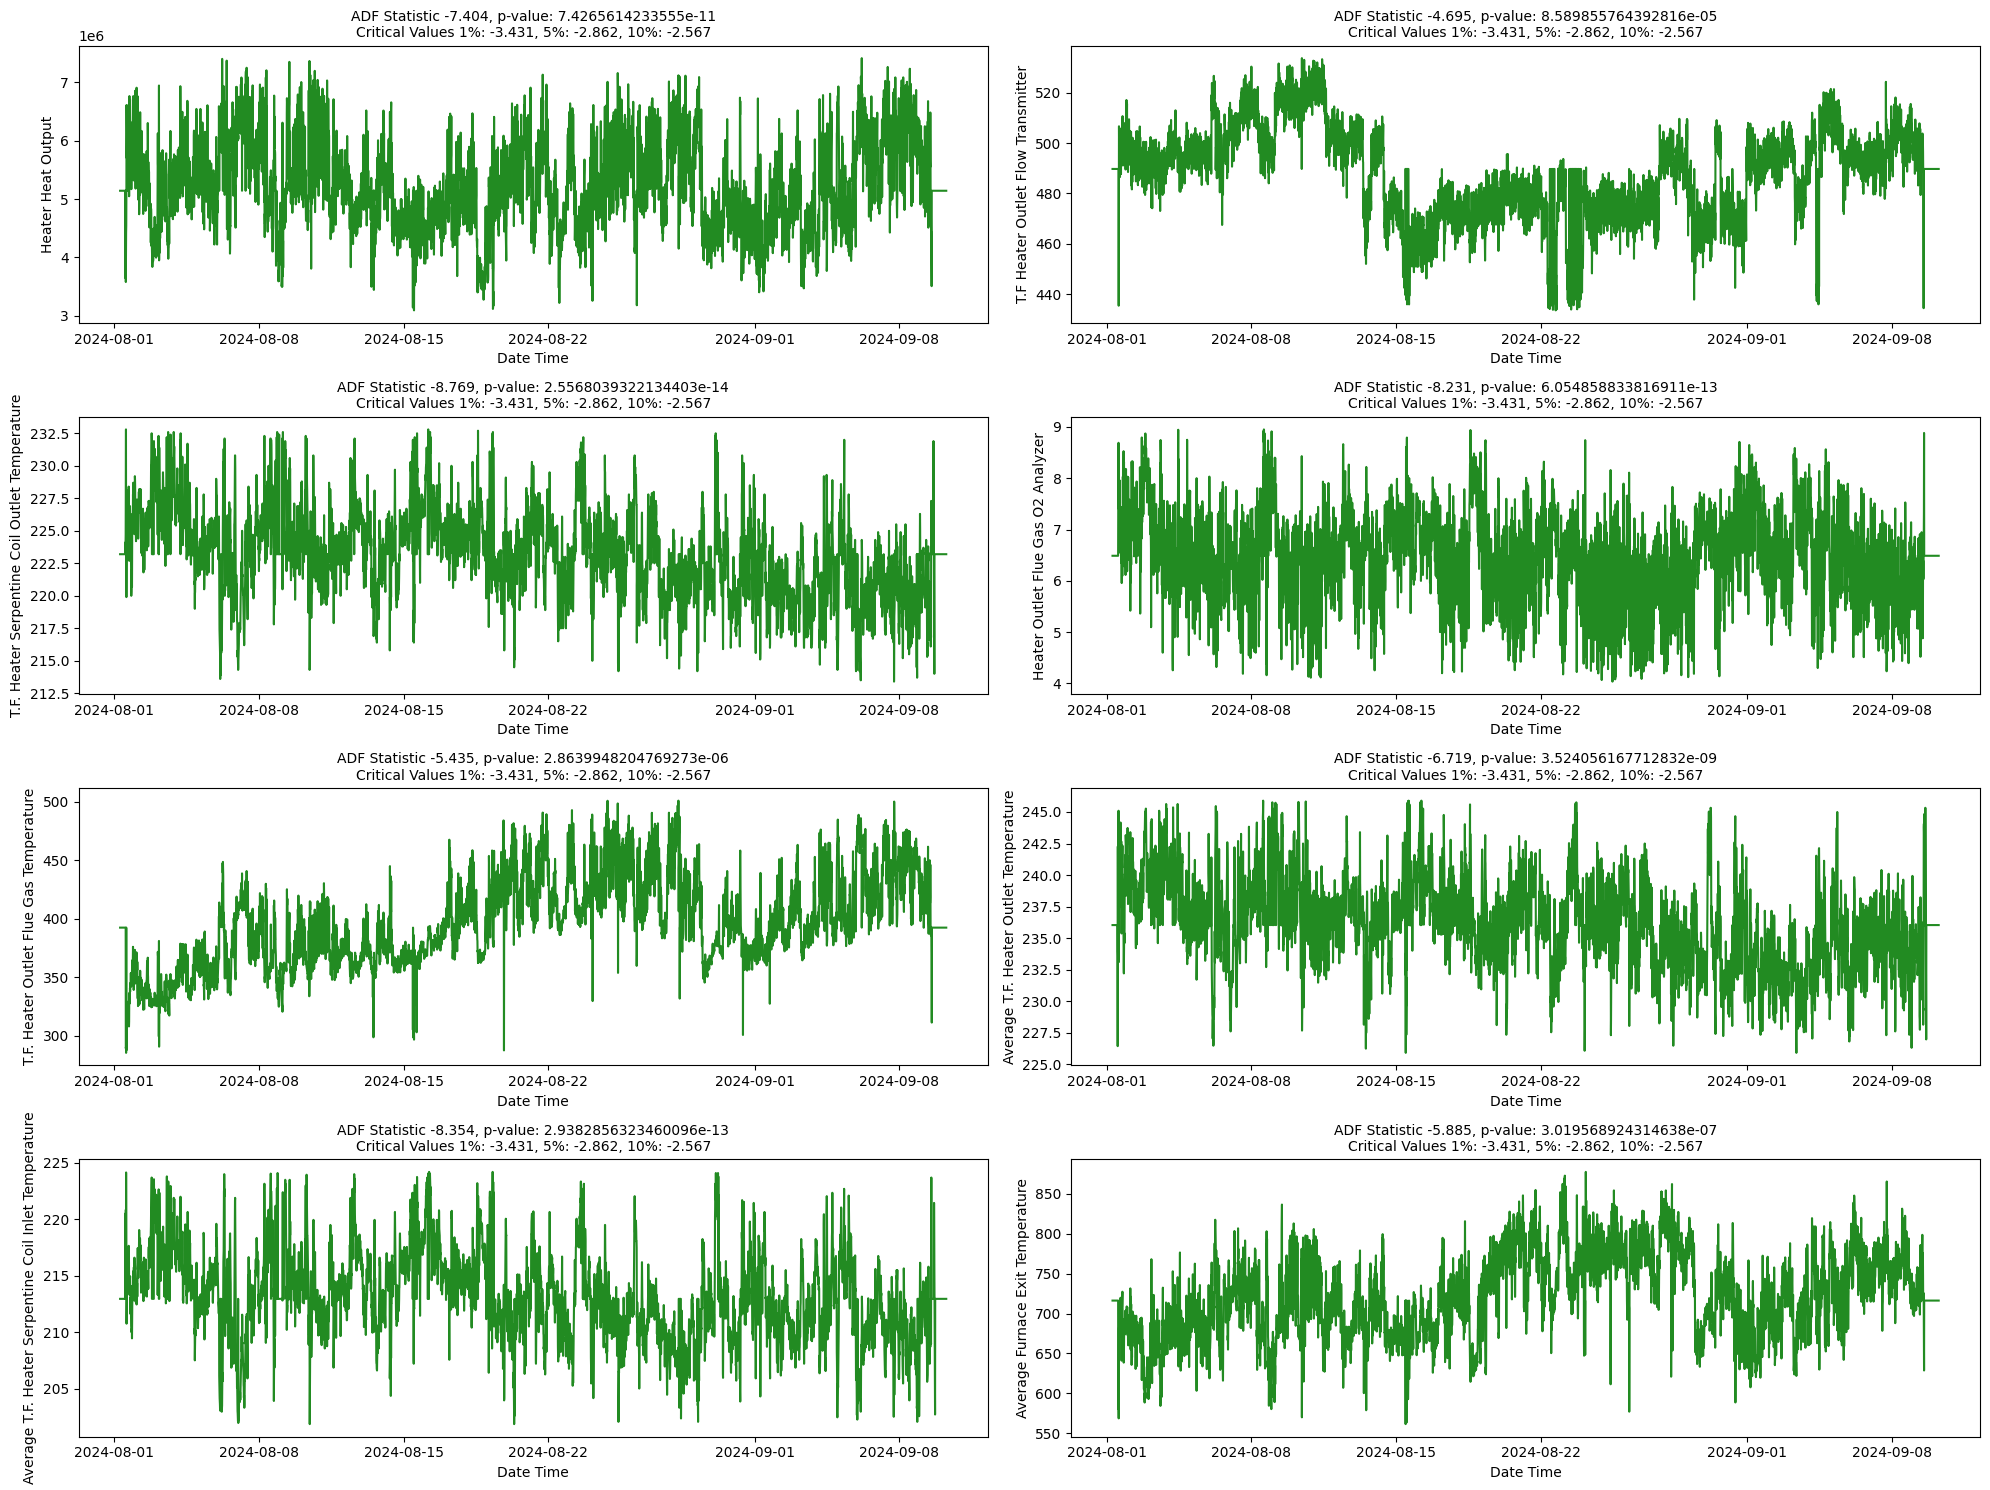

In [18]:

f, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df['Date Time'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=10)
    ax.set_ylabel(ylabel=title, fontsize=10)

visualize_adfuller_results(df['Heater Heat Output'].values, 'Heater Heat Output', ax[0, 0])
visualize_adfuller_results(df['T.F Heater Outlet Flow Transmitter'].values, 'T.F Heater Outlet Flow Transmitter', ax[0, 1])
visualize_adfuller_results(df['T.F. Heater Serpentine Coil Outlet Temperature'].values, 'T.F. Heater Serpentine Coil Outlet Temperature', ax[1, 0])
visualize_adfuller_results(df['Heater Outlet Flue Gas O2 Analyzer'].values, 'Heater Outlet Flue Gas O2 Analyzer', ax[1, 1])
visualize_adfuller_results(df['T.F. Heater Outlet Flue Gas Temperature'].values, 'T.F. Heater Outlet Flue Gas Temperature', ax[2, 0])
visualize_adfuller_results(df['Average T.F. Heater Outlet Temperature'].values, 'Average T.F. Heater Outlet Temperature', ax[2, 1])
visualize_adfuller_results(df['Average T.F. Heater Serpentine Coil Inlet Temperature'].values, 'Average T.F. Heater Serpentine Coil Inlet Temperature', ax[3, 0])
visualize_adfuller_results(df['Average Furnace Exit Temperature'].values, 'Average Furnace Exit Temperature', ax[3, 1])

plt.tight_layout()
plt.show()

According to the ADF tests, all the features are stationary because the P-value is lower than 0.05. This is rejecting the null hypothesis. 


## Decomposition

The **characteristics of a time series** are
* Trend and Level
* Seasonality
* Random / Noise

We can use the function `seasonal_decompose()` from the [statsmodels](https://www.statsmodels.org) library.

* Additive: $y(t) = Level + Trend + Seasonality + Noise$
* Multiplicative: $y(t) = Level * Trend * Seasonality * Noise$

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  [
    'Heater Heat Output', 'T.F Heater Outlet Flow Transmitter',
    'T.F. Heater Serpentine Coil Outlet Temperature', 'Heater Outlet Flue Gas O2 Analyzer',
    'T.F. Heater Outlet Flue Gas Temperature', 'Average T.F. Heater Outlet Temperature',
    'Average T.F. Heater Serpentine Coil Inlet Temperature', 'Average Furnace Exit Temperature'
]

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period=120, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

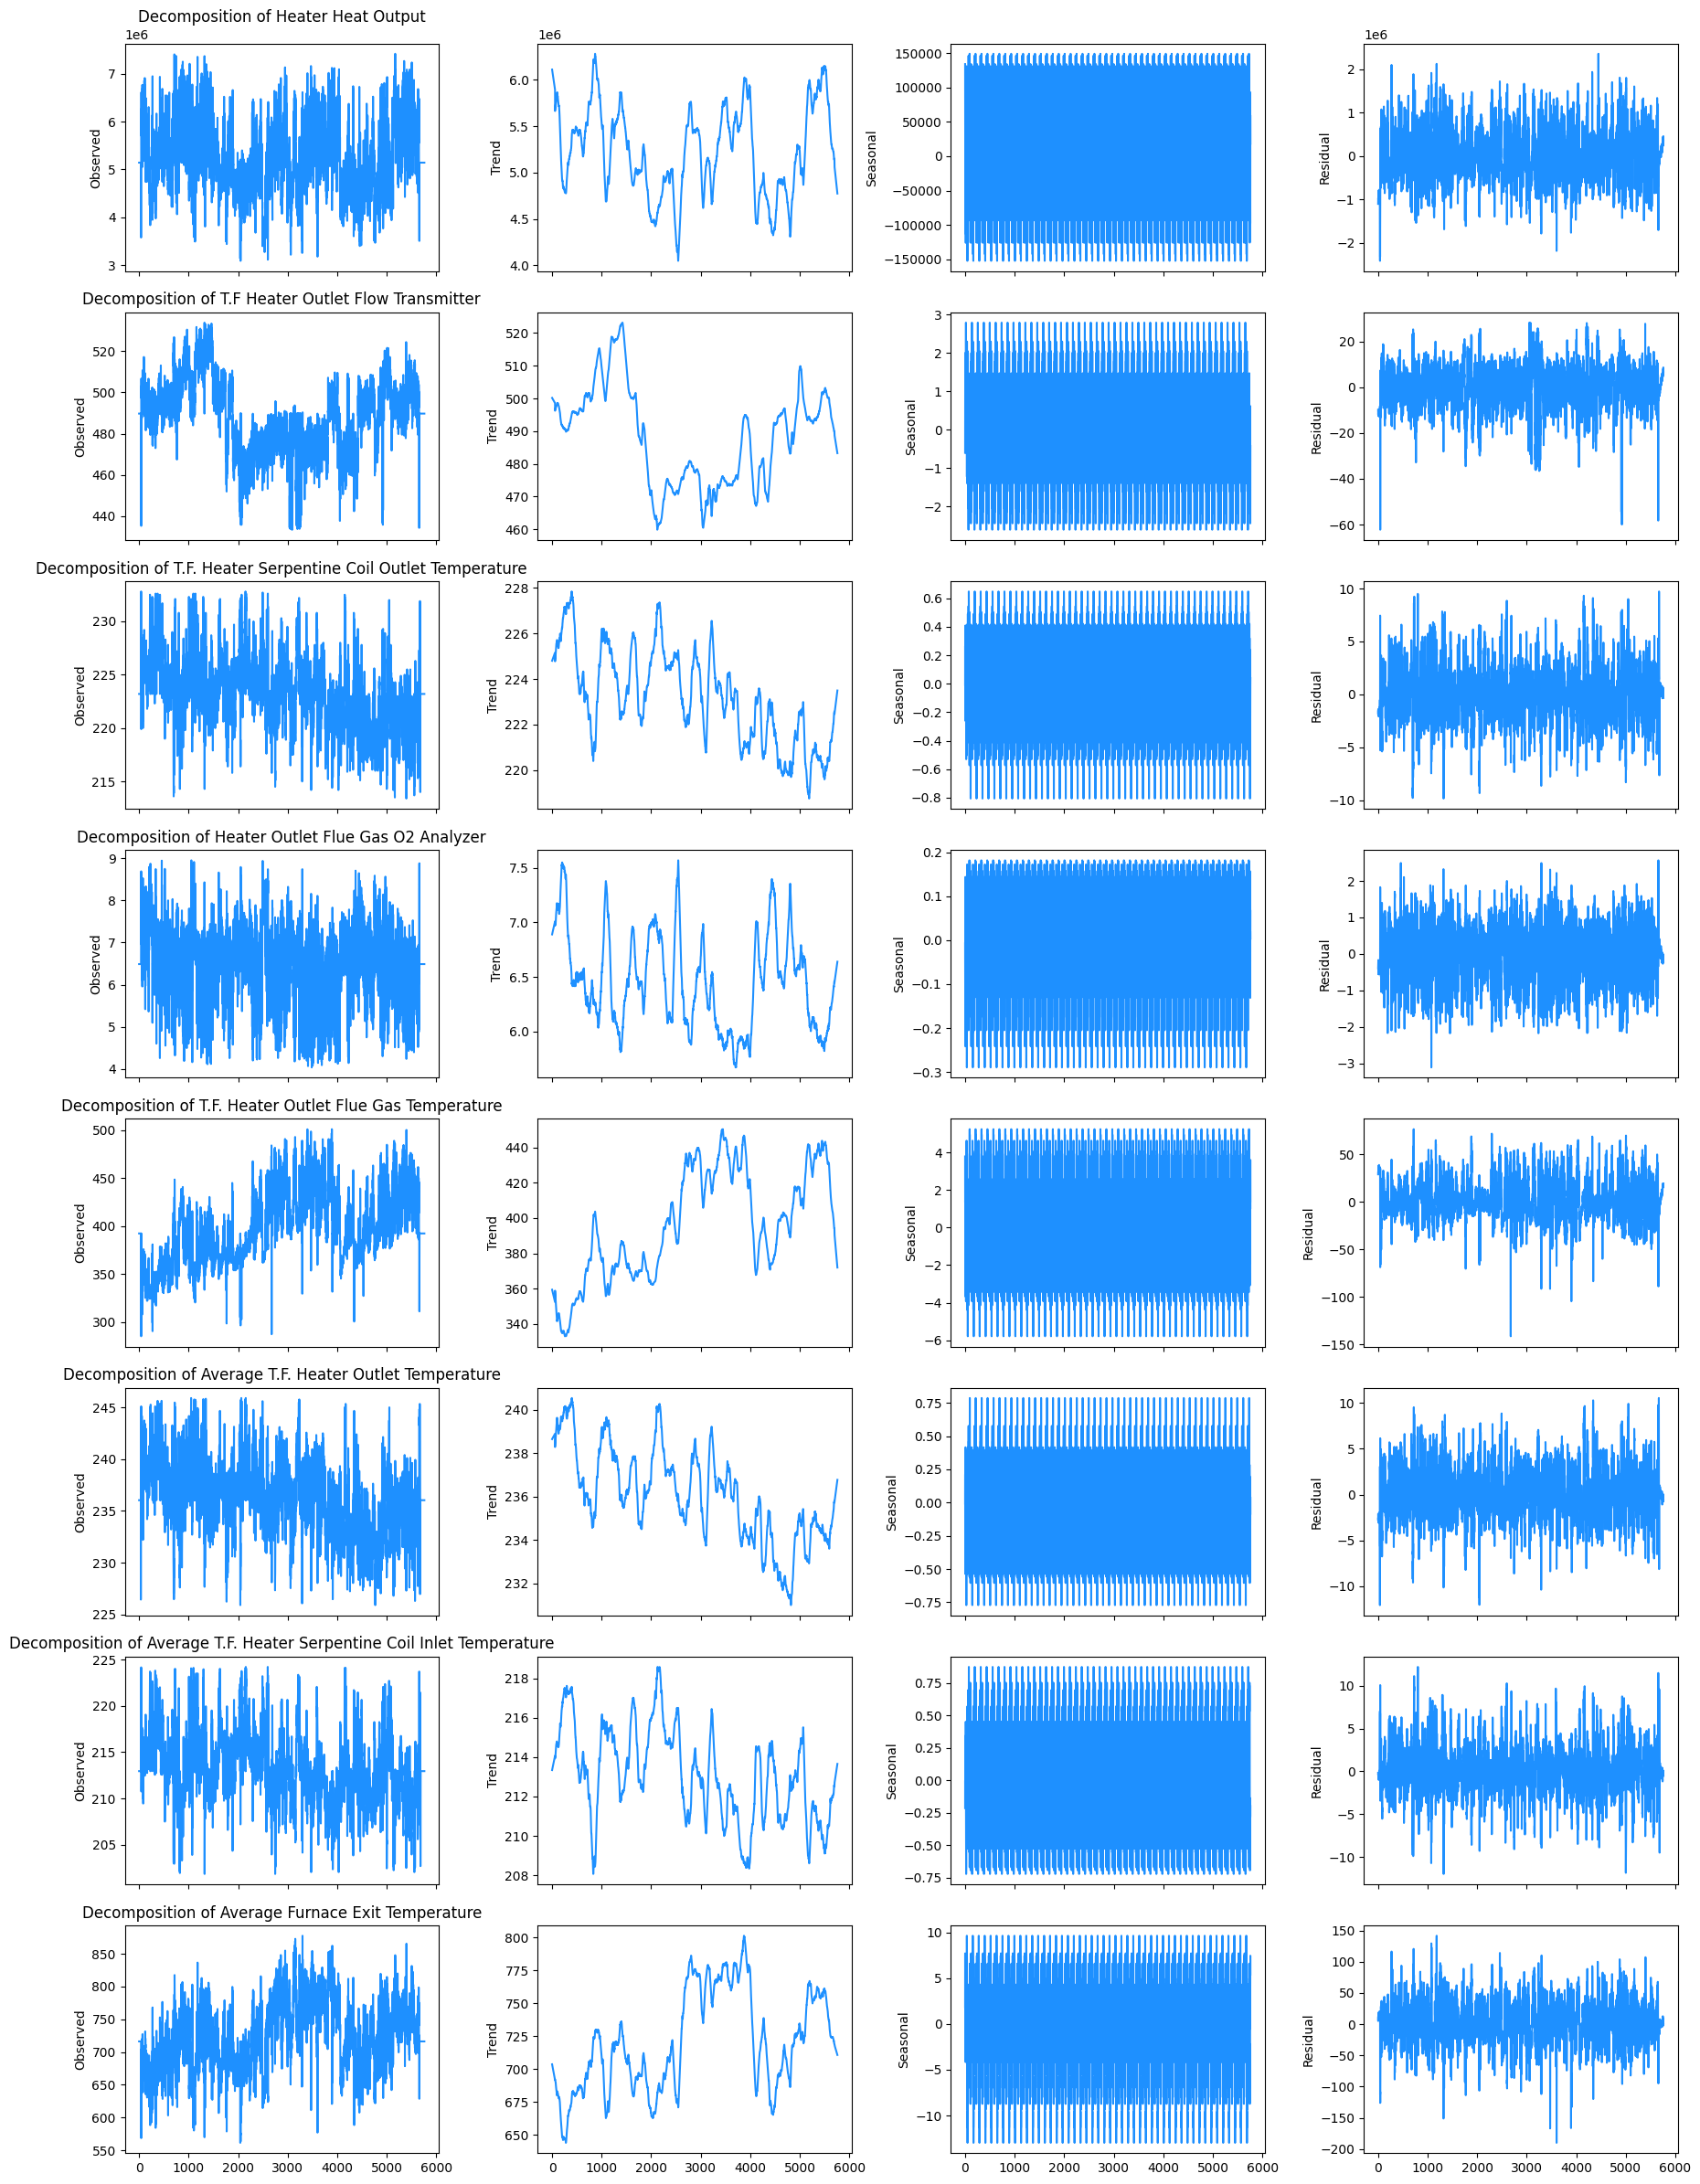

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
cols = decompose_cols  # defined in the previous cell
fig, ax = plt.subplots(nrows=len(cols), ncols=4, sharex=True, figsize=(18, 24))

for i, col in enumerate(cols):
    res = seasonal_decompose(df[col], period=120, model='additive', extrapolate_trend='freq')

    # Observed
    ax[i, 0].set_title(f'Decomposition of {col}', fontsize=12)
    res.observed.plot(ax=ax[i, 0], legend=False, color='dodgerblue')
    ax[i, 0].set_ylabel('Observed', fontsize=10)

    # Trend
    res.trend.plot(ax=ax[i, 1], legend=False, color='dodgerblue')
    ax[i, 1].set_ylabel('Trend', fontsize=10)

    # Seasonal
    res.seasonal.plot(ax=ax[i, 2], legend=False, color='dodgerblue')
    ax[i, 2].set_ylabel('Seasonal', fontsize=10)

    # Residual
    res.resid.plot(ax=ax[i, 3], legend=False, color='dodgerblue')
    ax[i, 3].set_ylabel('Residual', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()

Overview
This visualization shows **seasonal decomposition** of 8 time series features into trend, seasonal, and residual components.

Decomposition Structure
Each feature is decomposed into 4 columns:

1. **Original** - Raw time series data
2. **Trend** - Long-term directional movement
3. **Seasonal** - Repeating patterns (high-frequency oscillations visible)
4. **Residual** - Random noise after removing trend/seasonality

Key Observations

Strong Seasonality
All features show clear, regular oscillations in the seasonal component (column 3), indicating periodic patterns (likely hourly/daily cycles).

Trend Patterns
- **Declining trends**: Serpentine temperatures, Flue Gas O2, Average temperatures
- **Stable trends**: Heat Output, Flow Transmitter
- **Increasing trend**: Flue Gas Temperature

Residuals
Column 4 shows relatively small, random fluctuations, indicating the decomposition captured most structure well.

Implications
- Strong seasonality requires seasonal differencing or seasonal models (SARIMA, Prophet) for forecasting
- Clear decomposition validates using these components for feature engineering or detrending

## Autocorrelation Analysis

<div class="alert alert-block alert-info">
    For further details on this topic, see my other notebook: 
    <a href="https://www.kaggle.com/iamleonie/time-series-interpreting-acf-and-pacf">Time Series: Interpreting ACF and PACF</a>
</div>



This EDA step is especially important when using [ARIMA](#ARIMA). The autocorrelation analysis helps to identify the AR and MA parameters for the [ARIMA](#ARIMA) model.

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

* **Autocorrelation  Function (ACF)**: Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> <font color='blue'>MA parameter is q significant lags</font>
* **Partial Autocorrelation Function (PACF)**: Additional correlation explained by each successive lagged term -> <font color='purple'>AR parameter is p significant lags</font>

Autocorrelation helps in detecting seasonality.

As we can infer from the graph above, the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.

For the AR process, we expect that the ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. To define a MA process, we expect the opposite from the ACF and PACF plots, meaning that: the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend.

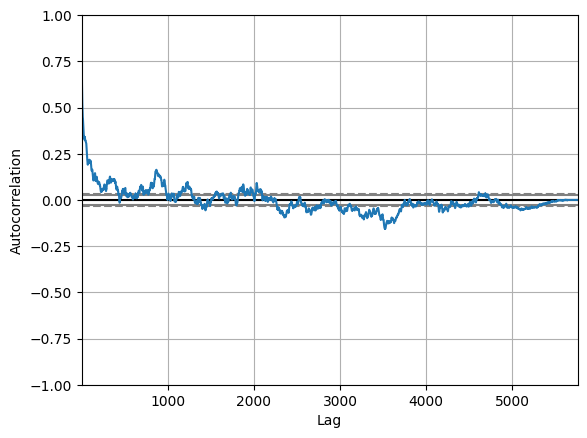

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Average T.F. Heater Serpentine Coil Inlet Temperature'])
plt.show()

We can see some sinusoidal shape in both ACF and PACF functions. This suggests that both AR and MA processes are present.

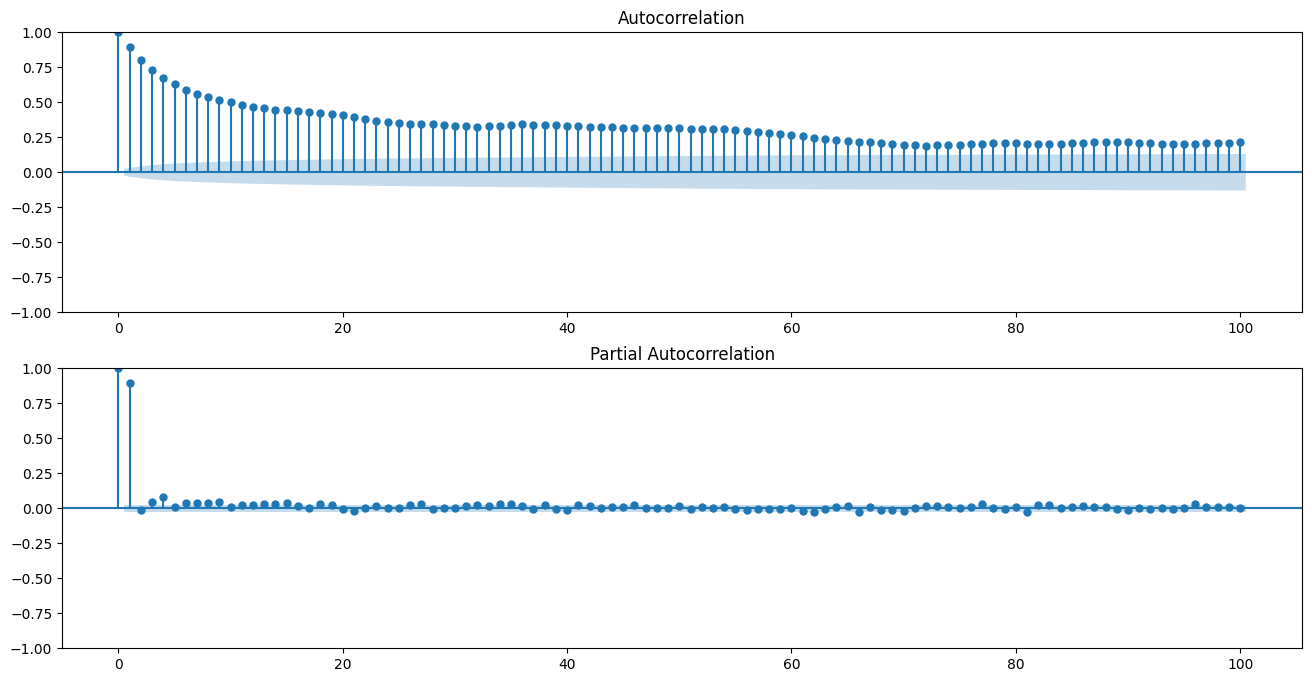

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['Average T.F. Heater Serpentine Coil Inlet Temperature'],lags=100, ax=ax[0])
plot_pacf(df['Average T.F. Heater Serpentine Coil Inlet Temperature'],lags=100, ax=ax[1])
plt.show()

# Cross Validation

For cross validation, you can use the [Time Series Split](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split) library. 
In [Time Series Forecasting: Building Intuition](https://www.kaggle.com/iamleonie/time-series-forecasting-building-intuition), I go into depth about different types of time series problems and their cross validation methods.

In [35]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['Date Time']
y = df['Average T.F. Heater Serpentine Coil Inlet Temperature']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

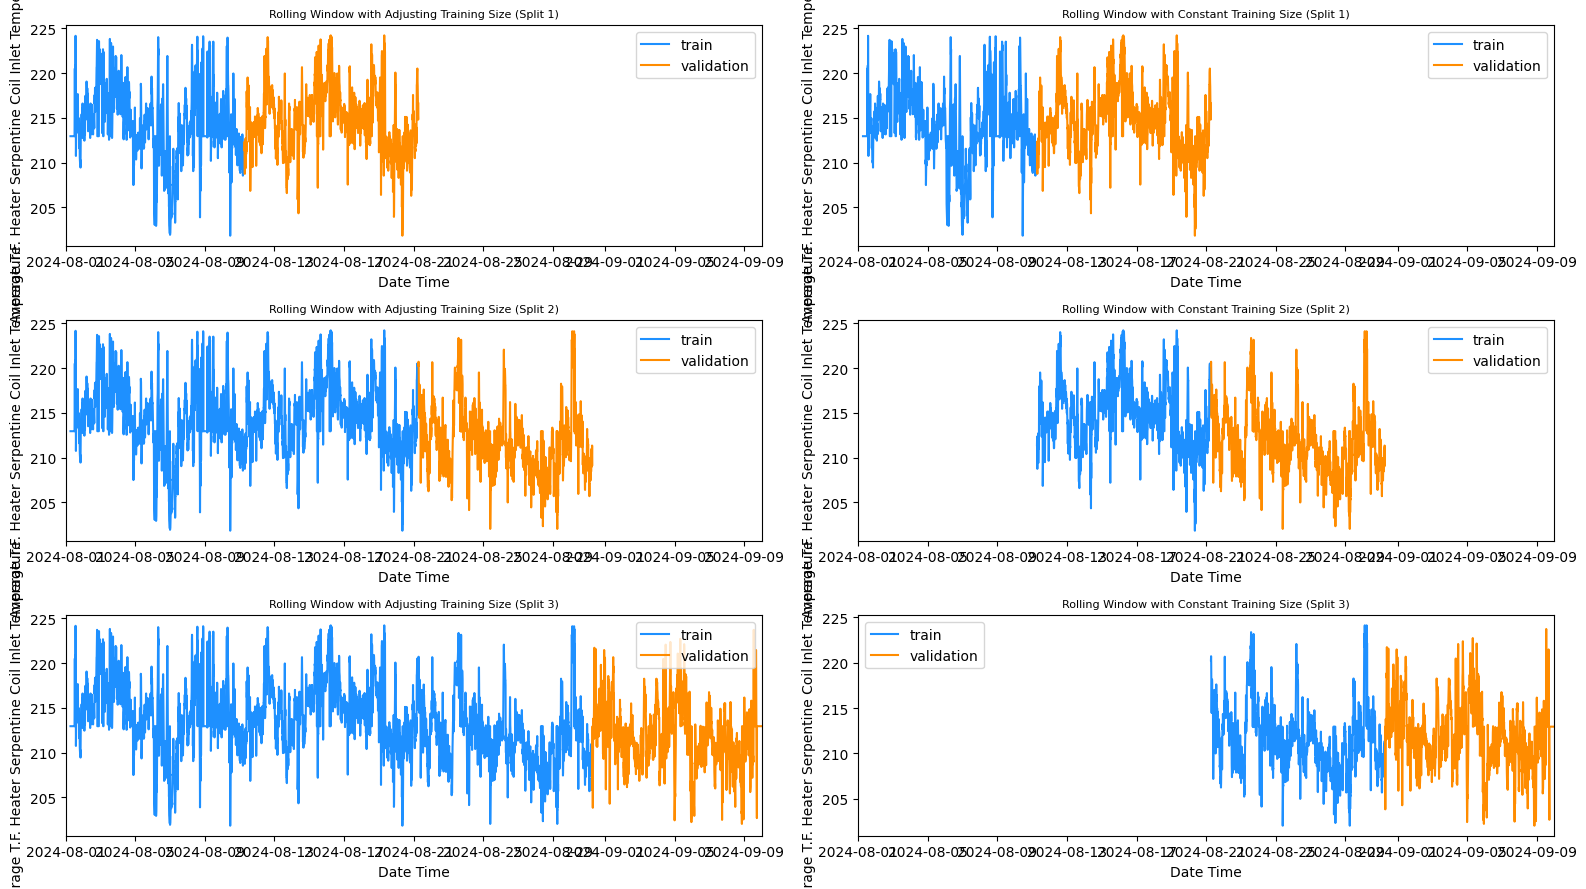

In [38]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 y= y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=8)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=8)

for i in range(N_SPLITS):
    ax[i,0].set_xlim([date(2024, 8, 1), date(2024, 9, 10)])
    ax[i,1].set_xlim([date(2024, 8, 1), date(2024, 9, 10)])
plt.tight_layout()
plt.show()

# Models

Time series can be either **univariate or multivariate**:
* **Univariate** time series only has a single time-dependent variable.
* **Multivariate** time series have a multiple time-dependent variable.

Our example originally is a multivariate time series because its has multiple features that are all time-dependent. However, by only looking at the target variable `Depth to Groundwater` we can convert it to a univariate time series.

We will focus on a **quarterly forecast**. We will use the **Q2 2020 as test data** and the remaining data will be **split by quarter for cross validation**.

We will evaluate the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) of the models. For metrics are better the smaller they are.



## Models for Univariate Time Series

* Stochastic Models
    * [Naive Approach](#Naive-Approach)<br>
    * [Moving Average](#Moving-Average)<br>
    * [Exponential Smoothing](#MExponential-Smoothing)<br>
    * [ARIMA](#ARIMA)<br>
    * [Prophet](#Prophet)<br>
* Deep Learning
    * [LSTM](#LSTM)<br>
    * [GRU](#GRU)<br>

In [39]:
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'Average T.F. Heater Serpentine Coil Inlet Temperature'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 46

X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'quarter'

In [ ]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()

In [ ]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.Date, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
    ax[0].set_ylim([-27, -23])
    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Depth to Groundwater P25', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    ax[1].set_ylim([0, 4])   
    plt.show()

### Naive Approach

$\hat y_{t+1} = y_t$

In [ ]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]
    
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

### Moving Average

In [ ]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))
    
    # Prediction: Naive approach    
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
        
    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Weeks)')

Neither the Naive Approach nor the Moving Average Approach are yielding good results for our example. Usually, these approaches serve as a benchmark rather than the method of choice.

### ARIMA
The Auto-Regressive Integrated Moving Average (ARIMA) model describes the **autocorrelations** in the data. The model assumes that the time-series is **stationary**. It consists of three main parts:
* <font color='purple'>Auto-Regressive (AR) filter (long term)</font>: 
    
    $\color{purple}{y_t = c + \alpha_1 y_{t-1} + \dots \alpha_{\color{purple}p}y_{t-\color{purple}p} + \epsilon_t = c + \sum_{i=1}^p{\alpha_i}y_{t-i} + \epsilon_t}$  -> p
* <font color='orange'> Integration filter (stochastic trend)</font>
    
    -> d
* <font color='blue'>Moving Average (MA) filter (short term)</font>:

    $\color{blue}{y_t = c + \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} = c + \epsilon_t + \sum_{i=1}^q{\beta_i}\epsilon_{t-i}} $  -> q 


**ARIMA**: $y_t = c + \color{purple}{\alpha_1 y_{t-1} + \dots + \alpha_{\color{purple}p}y_{t-\color{purple}p}} 
+ \color{blue}{\epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q}}$


ARIMA(
<font color='purple'>p</font>,
<font color='orange'>d</font>,
<font color='blue'>q</font>)

* <font color='purple'>p</font>: Lag order (to determine see  PACF in [Autocorrelation Analysis](#Autocorrelation-Analysis))
* <font color='orange'>d</font>: Degree of differencing. (to determine see  Differencing in [Stationarity](#Stationarity))
* <font color='blue'>q</font>: Order of moving average (to determine see  ACF in [Autocorrelation Analysis](#Autocorrelation-Analysis))

In our example, we can use <font color='orange'>d=0</font> if we use the feature `Depth_to_Groundwater_diff_1`, which is `Depth_to_Groundwater` differenced by the first degree. Otherwise, if we were to use the non-stationary feature `Depth_to_Groundwater` as it is, we should set <font color='orange'>d=1</font>.

(work in progress...)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

score_mae = []
score_rsme = []

for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = ARIMA(y_train, order=(1,1,1))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.predict(valid_index[0], valid_index[-1])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))


# Fit model with Vector Auto Regression (VAR)
model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.predict(y.index[-1]+1, y.index[-1] + len(y_test)).reset_index(drop=True)
plot_approach_evaluation(y_pred, score_mae, score_rsme, 'ARIMA')

## Models for Multivariate Time Series

### Vector Auto Regression (VAR)

In [ ]:
from statsmodels.tsa.api import VAR

score_mae = []
score_rsme = []

features = ['Temperature', 'Drainage_Volume', 'River_Hydrometry','Rainfall' ]
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    X_train, X_valid = X.iloc[train_index][features], X.iloc[valid_index][features]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # Fit model with Vector Auto Regression (VAR)
    model = VAR(pd.concat([y_train, X_train], axis=1))
    model_fit = model.fit()
    
    # Prediction with Vector Auto Regression (VAR)
    y_valid_pred = model_fit.forecast(model_fit.y, steps=len(X_valid))
    y_valid_pred = pd.Series(y_valid_pred[:, 0])

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

# Fit model with Vector Auto Regression (VAR)
model = VAR(pd.concat([y, X[features]], axis=1))
model_fit = model.fit()

# Prediction with Vector Auto Regression (VAR)
y_pred = model_fit.forecast(model_fit.y, steps=len(X_valid))
y_pred = pd.Series(y_pred[:, 0])

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Vector Auto Regression (VAR)')